In [1]:
%load_ext autoreload
%autoreload 2


In [2]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

This notebook will getthe data into shape for multiple imputation

In [45]:
train_admet_all = pd.read_csv('data/train_admet_all.csv')
train_ix = np.load('data/train_split_idx.npy')
train_potency_all = pd.read_csv('data/train_potency_all.csv')

In [46]:
train_potency_all.head()

,CXSMILES,pIC50 (SARS-CoV-2 Mpro),Molecule Name,pIC50 (MERS-CoV Mpro)
0,COC[C@]1(C)C(=O)N(C2=CN=CC3=CC=CC=C23)C(=O)N1C...,NaN,ASAP-0000141,4.19
1,C=C(CN1CCC2=C(C=C(Cl)C=C2)C1C(=O)NC1=CN=CC2=CC...,5.29,ASAP-0000142,4.92
2,CNC(=O)CN1C[C@]2(C[C@H](C)N(C3=CN=CC=C3C3CC3)C...,NaN,ASAP-0000143,4.73
3,C=C(CN1CCC2=C(C=C(Cl)C=C2)C1C(=O)NC1=CN=CC2=CC...,6.11,ASAP-0000144,4.90
4,C=C(CN1CCC2=C(C=C(Cl)C=C2)C1C(=O)NC1=CN=CC2=CC...,5.62,ASAP-0000145,4.81


We're gonna use all admet data and the corresponding potency data.  This is because I'm assuming that the missingness in the ADMET data can be predicted by the potency and the other targets. 

In [47]:
train_admet = train_admet_all.iloc[train_ix, train_admet_all.columns.get_indexer(['CXSMILES', 'HLM', 'KSOL', 'LogD', 'MDR1-MDCKII', 'MLM', 'Molecule Name'])]
print(train_admet.shape)
train_all = train_admet.merge(right=train_potency_all.loc[:, ['pIC50 (SARS-CoV-2 Mpro)', 'Molecule Name','pIC50 (MERS-CoV Mpro)']], on=['Molecule Name'], how='left')
print(train_all.shape)

(347, 7)
(347, 9)


In [48]:


from utils import missing_data_clusters, plot_heatmap
clustered = missing_data_clusters(train_all)


/Users/robertarbon/mamba/envs/polaris/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/robertarbon/mamba/envs/polaris/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  3.34it/s, max_LL=-542, max_avg_LL=-1.56]
/Users/robertarbon/mamba/envs/polaris/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
/Users/robertarbon/mamba/envs/polaris/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/robertarbon/mamba/envs/polaris/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/robertarbon/mamba/envs/polaris/lib/python3.12/site-packages/sklearn/base.py

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  3.41it/s, max_LL=-523, max_avg_LL=-1.51]
/Users/robertarbon/mamba/envs/polaris/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
/Users/robertarbon/mamba/envs/polaris/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/robertarbon/mamba/envs/polaris/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/robertarbon/mamba/envs/polaris/lib/python3.12/site-packages/sklearn/base.py

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  3.36it/s, max_LL=-523, max_avg_LL=-1.51]
/Users/robertarbon/mamba/envs/polaris/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
/Users/robertarbon/mamba/envs/polaris/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/robertarbon/mamba/envs/polaris/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/robertarbon/mamba/envs/polaris/lib/python3.12/site-packages/sklearn/base.py

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  3.28it/s, max_LL=-501, max_avg_LL=-1.44]
/Users/robertarbon/mamba/envs/polaris/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
/Users/robertarbon/mamba/envs/polaris/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/robertarbon/mamba/envs/polaris/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/robertarbon/mamba/envs/polaris/lib/python3.12/site-packages/sklearn/base.py

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  6.49it/s, max_LL=-499, max_avg_LL=-1.44]
/Users/robertarbon/mamba/envs/polaris/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/robertarbon/mamba/envs/polaris/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/robertarbon/mamba/envs/polaris/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/roberta

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.74it/s, max_LL=-498, max_avg_LL=-1.44]
/Users/robertarbon/mamba/envs/polaris/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
/Users/robertarbon/mamba/envs/polaris/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/robertarbon/mamba/envs/polaris/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/robertarbon/mamba/envs/polaris/lib/python3.12/site-packages/sklearn/base.py

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  6.13it/s, max_LL=-498, max_avg_LL=-1.44]
/Users/robertarbon/mamba/envs/polaris/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/robertarbon/mamba/envs/polaris/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/robertarbon/mamba/envs/polaris/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/roberta

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.82it/s, max_LL=-489, max_avg_LL=-1.41]
/Users/robertarbon/mamba/envs/polaris/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
/Users/robertarbon/mamba/envs/polaris/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/robertarbon/mamba/envs/polaris/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


<Axes: >

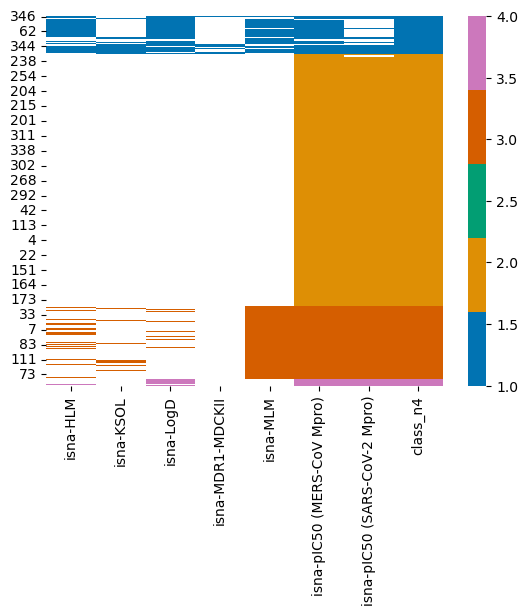

In [49]:
fig, ax = plt.subplots()
# The white spaces are non-missing values. The coloured spaces are missing values assigned to a cluster (for easy identification)
plot_heatmap(clustered,4, ax)

Looks like there's not much overlap between the potency and the admet data. Oh well. 

In [50]:
train = train_all.loc[:, ['Molecule Name', 'CXSMILES', 'HLM', 'KSOL', 'LogD', 'MDR1-MDCKII', 'MLM']]

In [51]:
train.describe()

,HLM,KSOL,LogD,MDR1-MDCKII,MLM
count,302.000000,325.000000,302.000000,340.000000,250.000000
mean,89.345364,197.969231,2.473477,4.283971,130.611600
std,179.525474,157.667349,1.391263,5.978747,238.820643
min,10.000000,2.000000,-1.000000,0.000000,10.000000
25%,10.000000,25.000000,1.500000,0.886500,13.100000
50%,19.650000,187.000000,2.700000,1.800000,47.000000
75%,85.000000,367.000000,3.600000,4.450000,139.750000
max,1380.000000,400.000000,4.500000,34.800000,1760.000000


The polaris scoring funtion is: 

```python
    epsilon = 1e-8
    pred = np.clip(pred, a_min=epsilon, a_max=None)
    ref = np.clip(ref, a_min=epsilon, a_max=None)

    # transform both log10scale
    pred_log10s = np.log10(pred)
    ref_log10s = np.log10(ref)

    # compute MALE and R2 in log space
    mae = mean_absolute_error(ref_log10s, pred_log10s)
    r2 = r2_score(ref_log10s, pred_log10s)
```

So we'll use the transform and scoring function 

In [52]:
epsilon = 1e-8
for col in ['MLM', 'HLM', 'KSOL', 'MDR1-MDCKII']: 
    train.loc[:, f"Log{col}"] = np.log10(np.clip(train[col], a_min=epsilon, a_max=None))

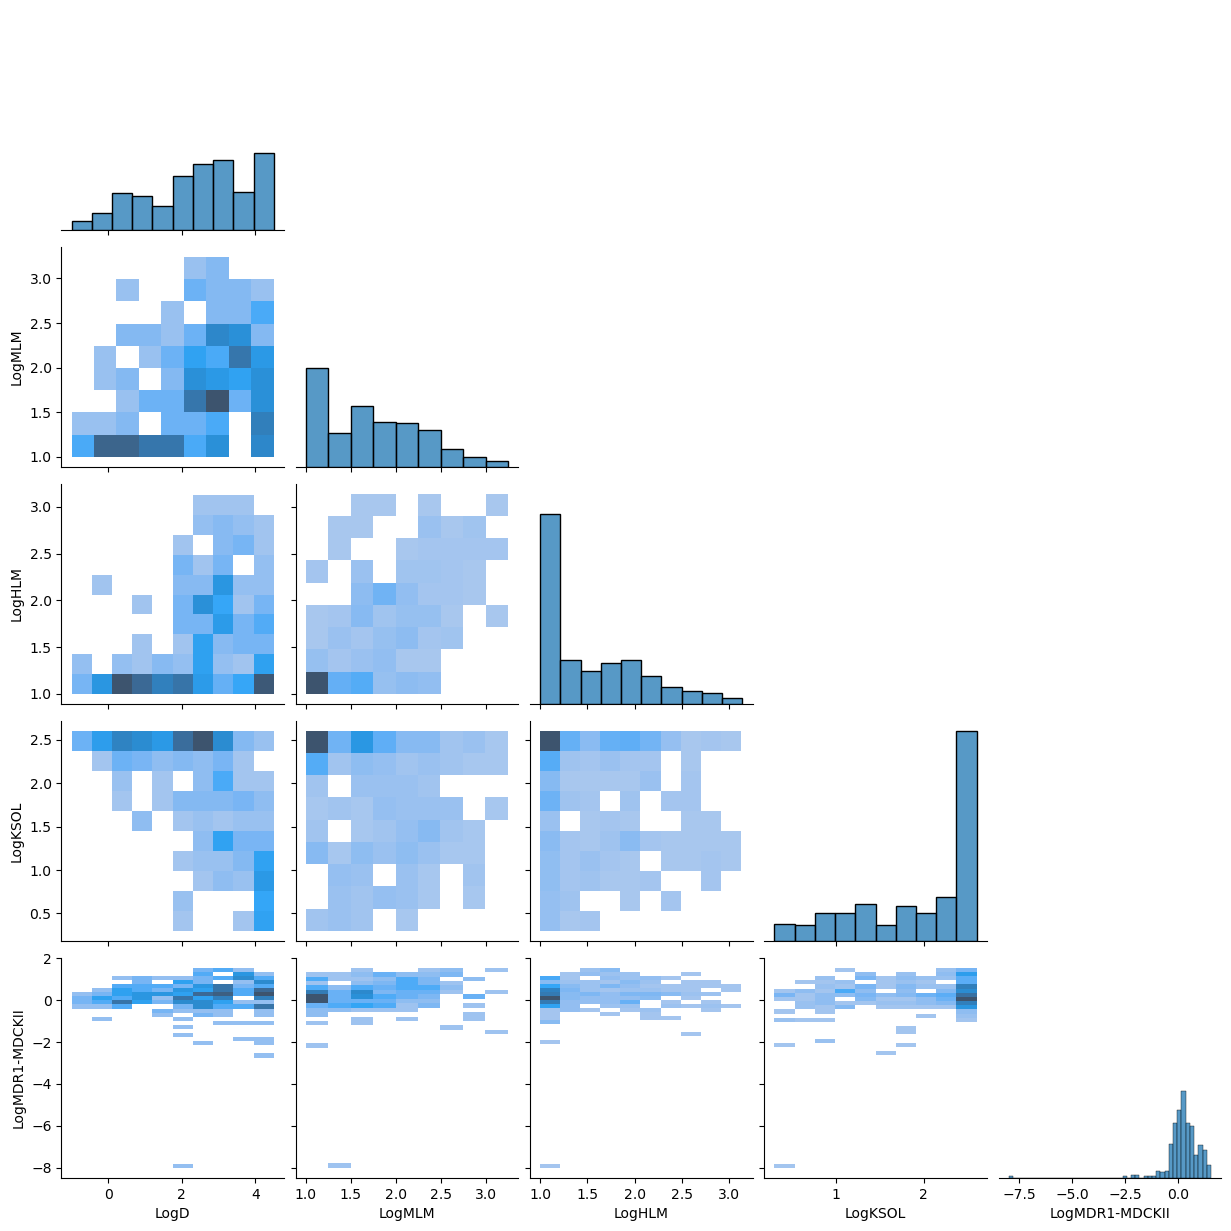

In [53]:
sns.pairplot(train.filter(regex='Log'),  kind='hist', diag_kind='hist', corner=True)

- LogD and LogMDR1-MDCKII don't show much sign of any ceiling or floor effects. 
- MLM and HLM have floor effects (obviously - I put them in)
- KSOL has a ciling effect. 


In [54]:
train.to_csv('imputed/train_admet_all_transformed.csv', index=False)

<Axes: >

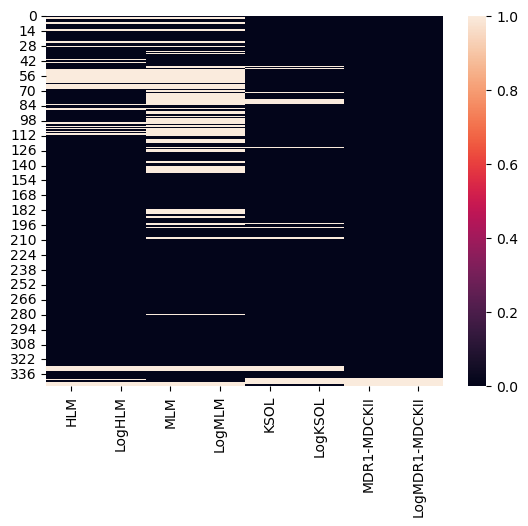

In [57]:
sns.heatmap(train.loc[:, ['HLM', 'LogHLM', 'MLM', 'LogMLM', 'KSOL', 'LogKSOL', 'MDR1-MDCKII', 'LogMDR1-MDCKII']].isna())

The scripe 'mice.R' will run the imputation. 

In [19]:
imp = pd.read_csv('imputed/train_admet_log_pmm.csv')
del imp['.id']
imp.rename(columns={'.imp': 'imp'}, inplace=True)

In [20]:
imp_melt = imp.melt(id_vars=['CXSMILES', 'Molecule.Name', 'imp'])
imp_melt.head()
imp_melt.loc[:, 'is_imputed'] = imp_melt['imp'] > 0

In [21]:
imp_melt.head()

,CXSMILES,Molecule.Name,imp,variable,value,is_imputed
0,COC1=CC=CC(Cl)=C1NC(=O)N1CCC[C@H](C(N)=O)C1 |a...,ASAP-0032437,0,LogMLM,1.0,False
1,O=C(NCC(F)F)[C@H](NC1=CC2=C(C=C1Br)CNC2)C1=CC(...,ASAP-0031915,0,LogMLM,NaN,False
2,O=C(NCC(F)F)[C@H](NC1=CC=C2CNCC2=C1)C1=CC(Br)=...,ASAP-0031884,0,LogMLM,NaN,False
3,NC(=O)[C@H]1CCCN(C(=O)CC2=CC=CC3=C2C=CO3)C1 |&...,ASAP-0031848,0,LogMLM,1.0,False
4,CC1=CC(CC(=O)N2CCC[C@H](C(N)=O)C2)=CC=N1 |&1:11|,ASAP-0031813,0,LogMLM,1.0,False


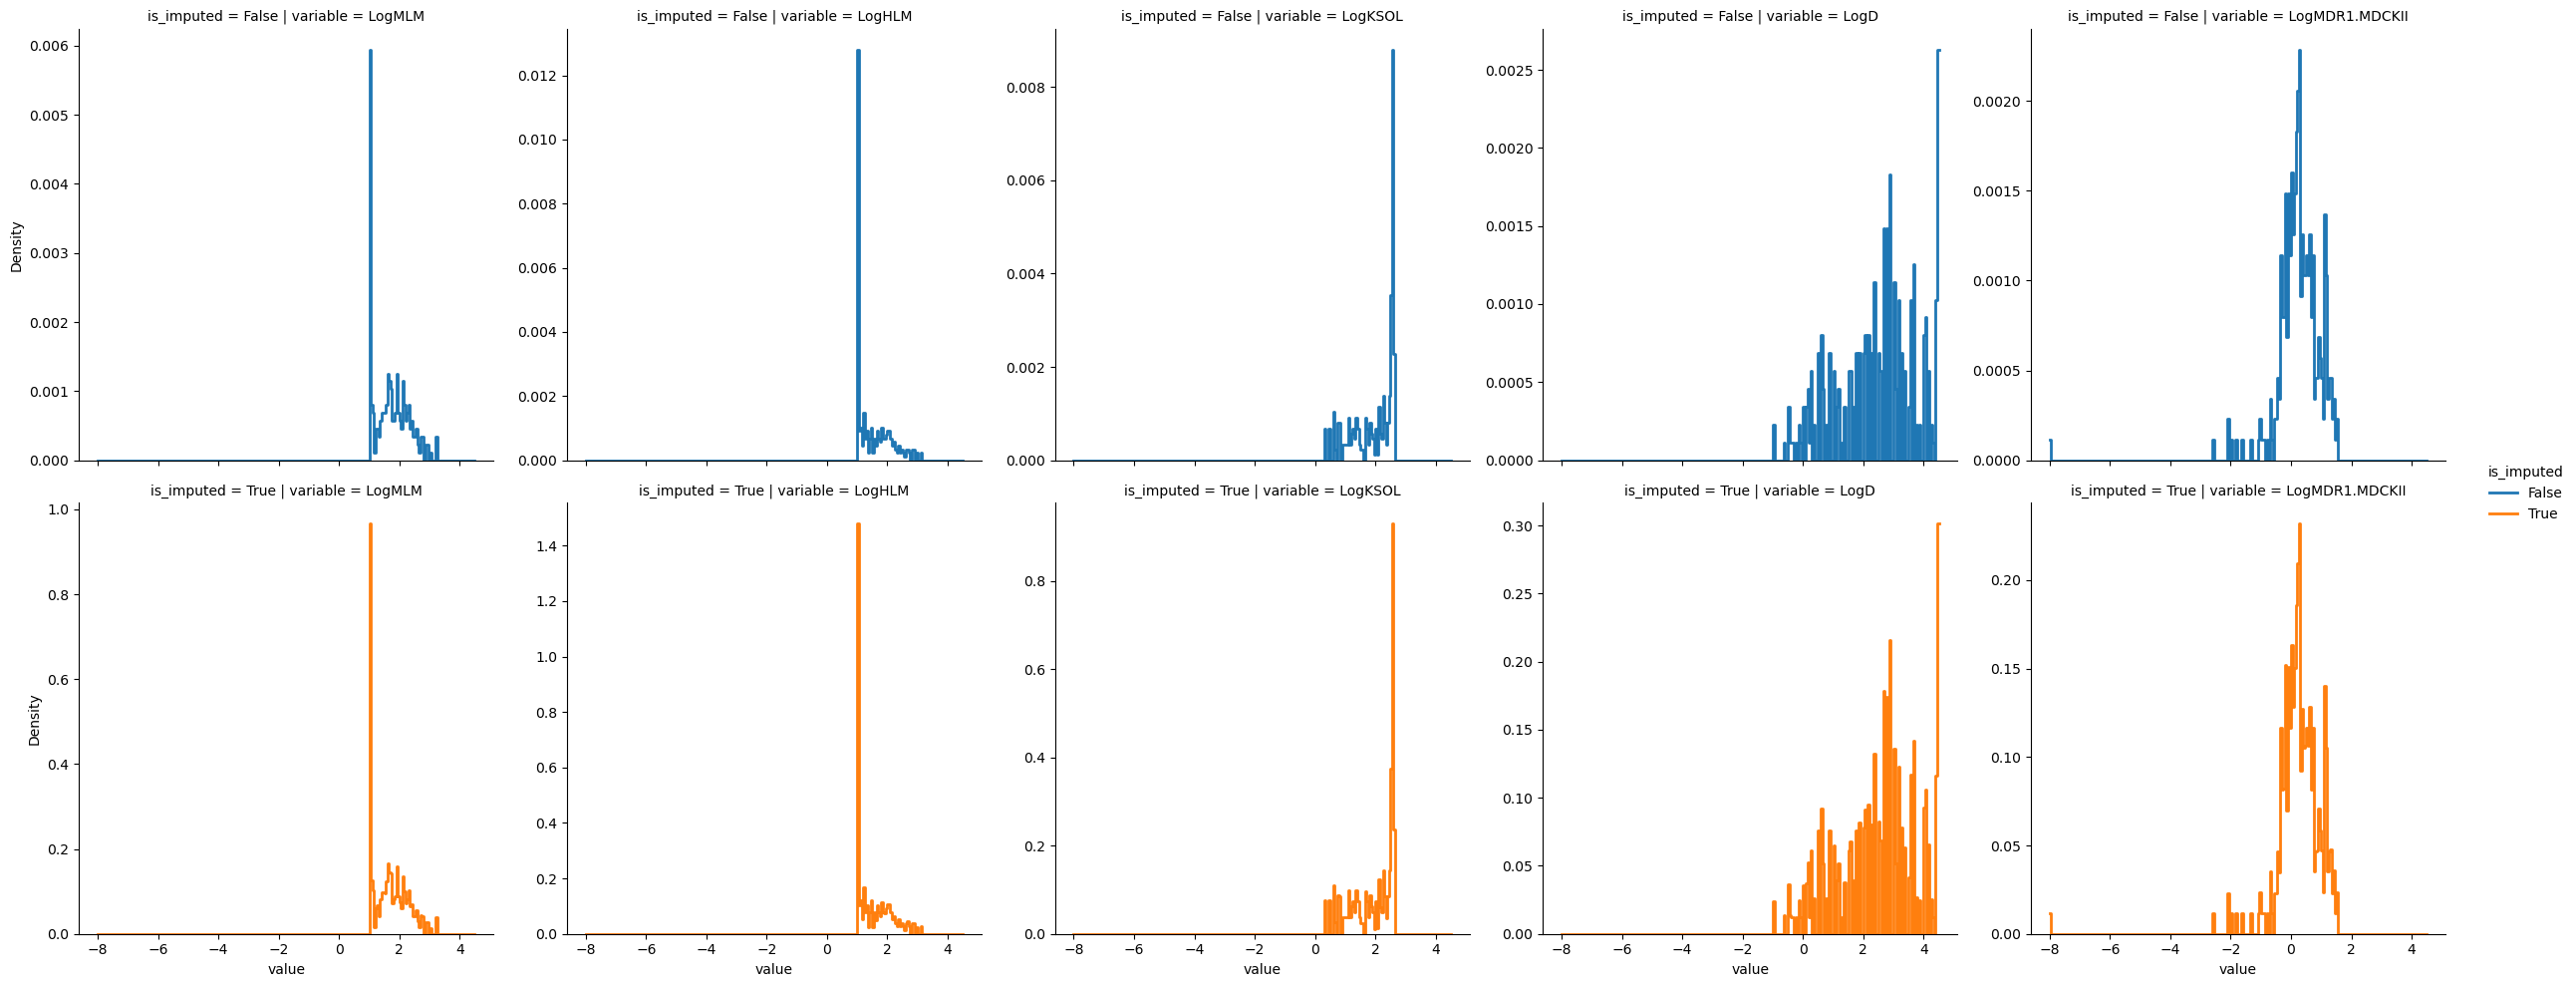

In [26]:
sns.displot(imp_melt, x='value', col='variable', hue='is_imputed', row='is_imputed', kind='hist', element='step', fill=False, lw=2, stat='density', facet_kws={'sharex': True, 'sharey': False} )

For now, this is good enough